In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [99]:
df = pd.read_csv(r"C:\Users\Vaishnavi\Downloads\Mall_Customers.csv")

In [100]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis

In [101]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


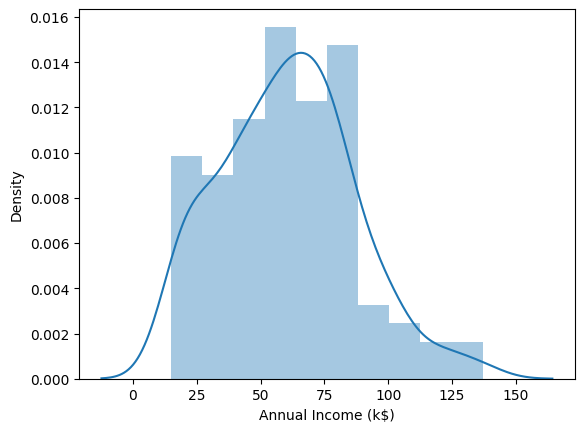

In [102]:
sns.distplot(df['Annual Income (k$)']);

In [103]:
df.columns


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

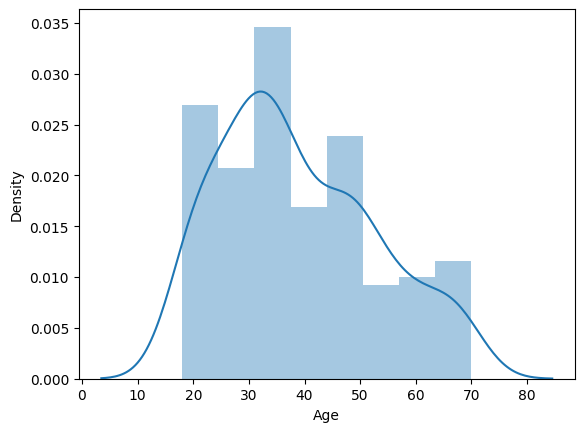

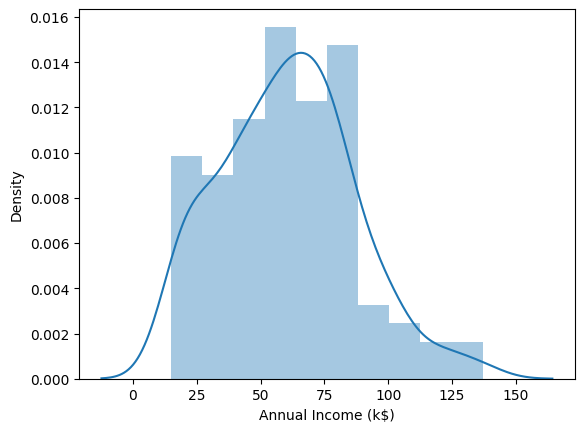

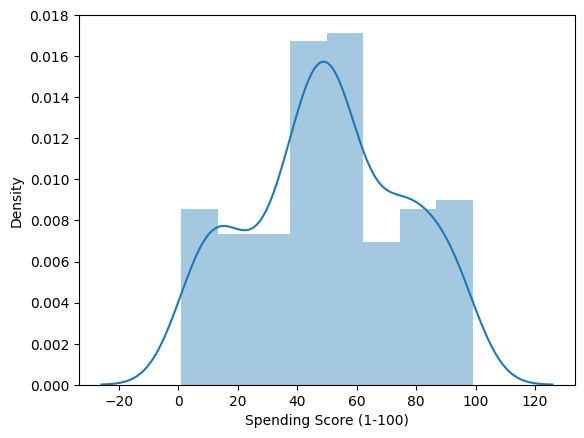

In [104]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

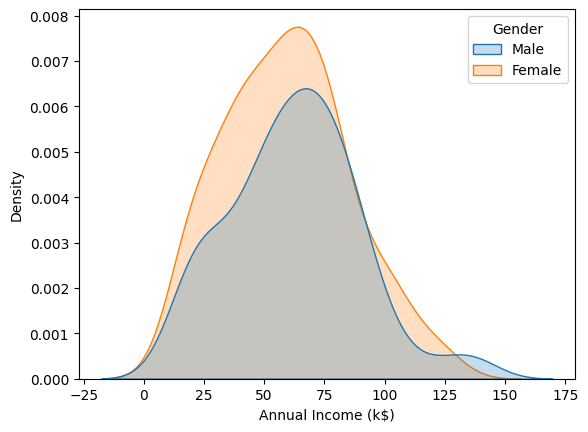

In [105]:
sns.kdeplot(data=df, x='Annual Income (k$)', shade=True, hue='Gender')
plt.show()

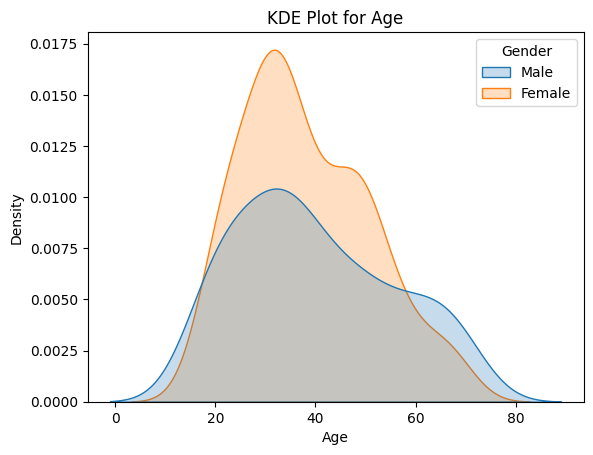

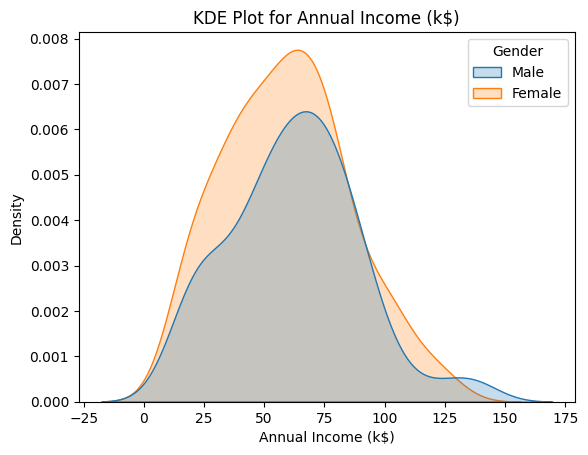

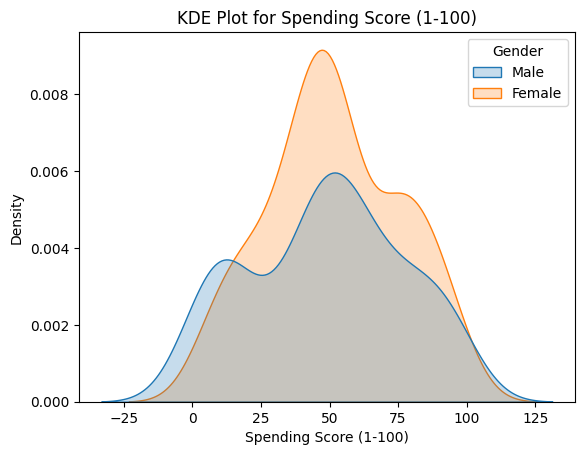

In [106]:
for i in columns:
    plt.figure()
    sns.kdeplot(x=df[i], hue=df['Gender'], shade=True)
    plt.title(f'KDE Plot for {i}')
    plt.show()

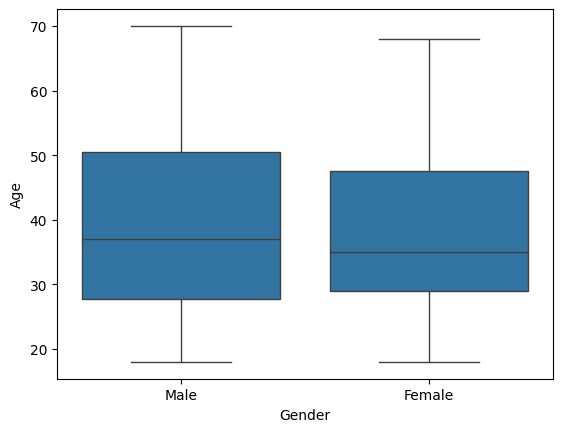

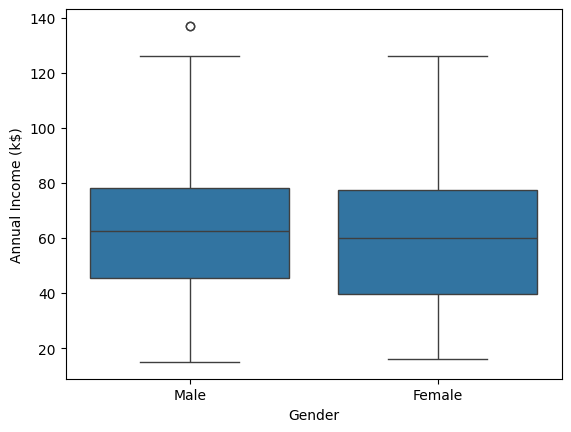

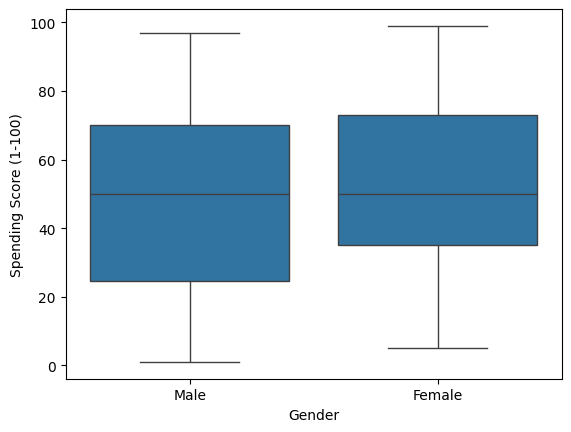

In [107]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i])

In [108]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

# Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

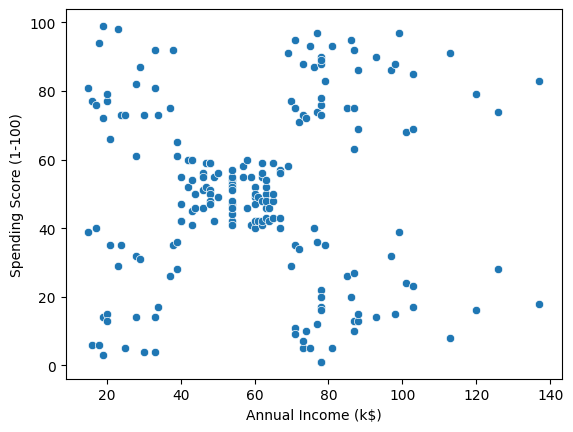

In [109]:
sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)' )

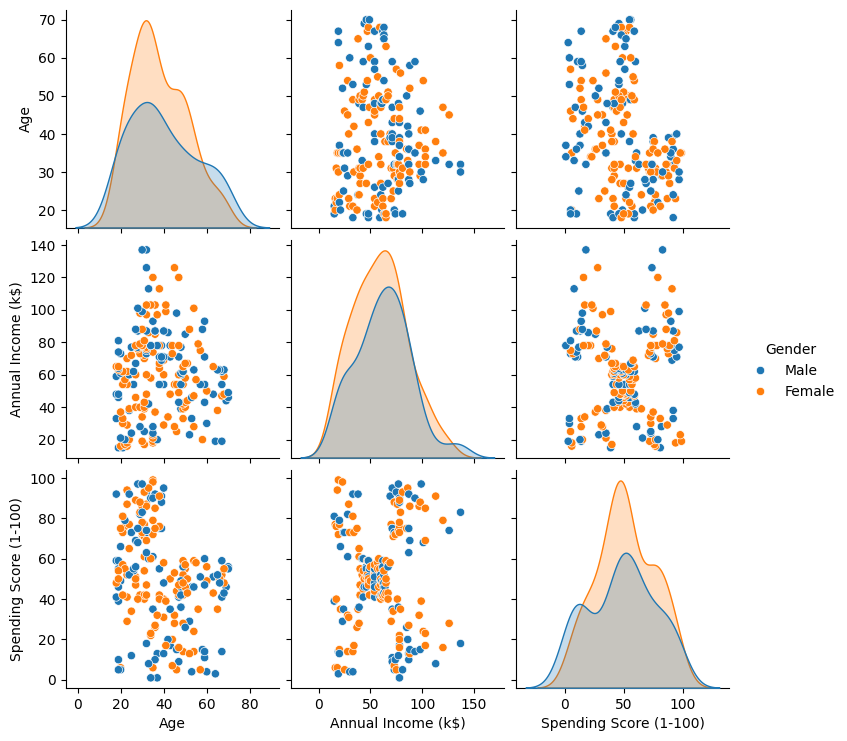

In [110]:
df=df.drop('CustomerID',axis=1, errors = 'ignore')
sns.pairplot(df,hue='Gender')

In [111]:
df.groupby(['Gender'])[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [112]:
df_numeric = df.select_dtypes(include=['number'])  # Select only numeric columns
df_numeric.corr()  # Compute correlation


,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

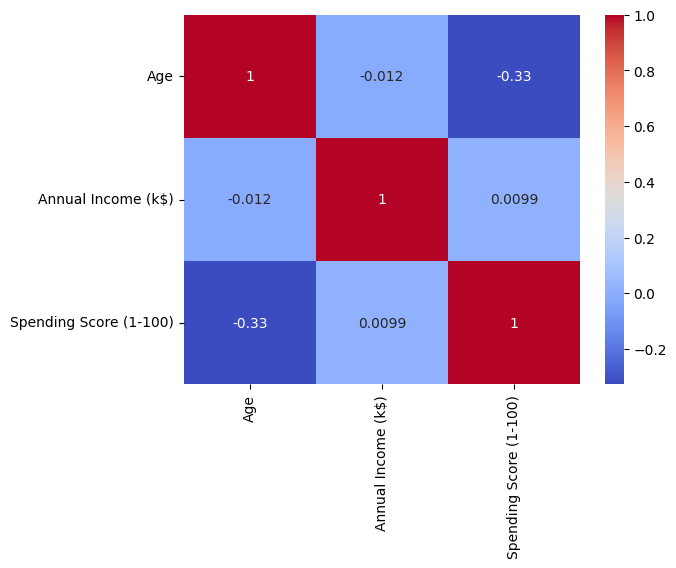

In [113]:
df_numeric = df.select_dtypes(include=['number'])  # Select numeric columns only
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')


# Clustering - Univariate, Bivariate, Multivariate

In [114]:
clustering1 = KMeans(n_clusters=3)

In [115]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [116]:
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [117]:
df['Income Cluster'] = clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,0


In [118]:
df['Income Cluster'].value_counts()

Income Cluster
1    104
0     74
2     22
Name: count, dtype: int64

In [119]:
clustering1.inertia_

24361.25921375921

In [120]:
intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    intertia_scores.append(kmeans.inertia_)

In [121]:
intertia_scores

[137277.28,
 49761.73701298701,
 25640.457784396836,
 14631.886877828054,
 8667.67961483751,
 5081.48466026727,
 4078.8715728715733,
 2897.775030525031,
 2385.7251443001446,
 2011.279401154401]

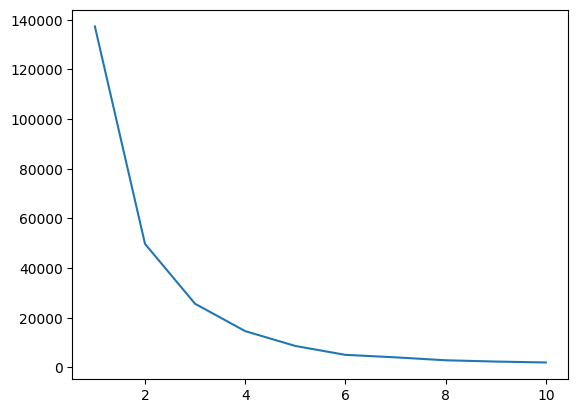

In [122]:
plt.plot(range(1,11),intertia_scores)

In [123]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster'],
      dtype='object')

In [124]:
df.groupby('Income Cluster')[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,39.500000,33.486486,50.229730
1,38.663462,69.750000,49.798077
2,37.545455,108.181818,52.000000


#Bivariate Clustering

In [125]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] =clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,0,4
1,Male,21,15,81,0,1
2,Female,20,16,6,0,4
3,Female,23,16,77,0,1
4,Female,31,17,40,0,4


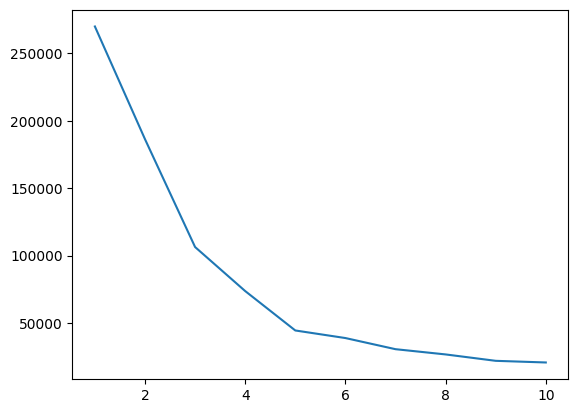

In [126]:
intertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),intertia_scores2)

In [144]:
centers =pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

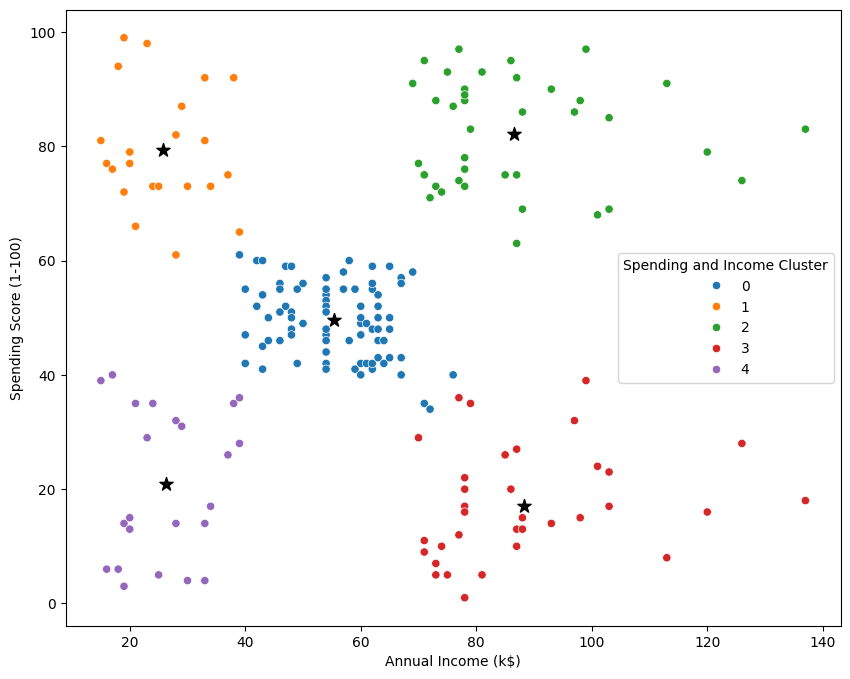

In [128]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df, x ='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')
plt.savefig('clustering_bivaraiate.png')

In [145]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.592593,0.407407
1,0.590909,0.409091
2,0.538462,0.461538
3,0.457143,0.542857
4,0.608696,0.391304


In [130]:
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,42.716049,55.296296,49.518519
1,25.272727,25.727273,79.363636
2,32.692308,86.538462,82.128205
3,41.114286,88.200000,17.114286
4,45.217391,26.304348,20.913043


In [146]:
#mulivariate clustering 
from sklearn.preprocessing import StandardScaler

In [147]:
scale = StandardScaler()

In [148]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,0,4
1,Male,21,15,81,0,1
2,Female,20,16,6,0,4
3,Female,23,16,77,0,1
4,Female,31,17,40,0,4


In [149]:
dff = pd.get_dummies(df,drop_first=True)
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,19,15,39,0,4,True
1,21,15,81,0,1,True
2,20,16,6,0,4,False
3,23,16,77,0,1,False
4,31,17,40,0,4,False


In [150]:
dff.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [151]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [152]:
dff = scale.fit_transform(dff)

In [153]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


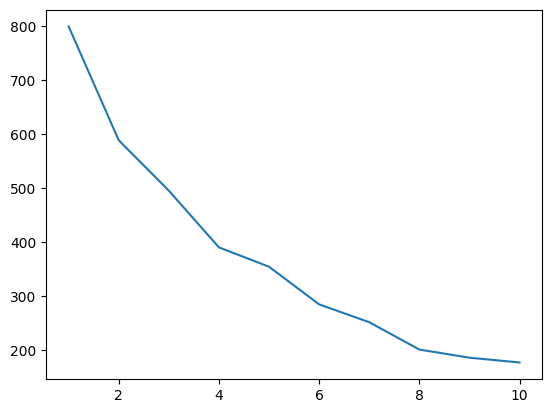

In [154]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),intertia_scores3)

In [140]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,0,4
1,Male,21,15,81,0,1
2,Female,20,16,6,0,4
3,Female,23,16,77,0,1
4,Female,31,17,40,0,4
...,...,...,...,...,...,...
195,Female,35,120,79,2,2
196,Female,45,126,28,2,3
197,Male,32,126,74,2,2
198,Male,32,137,18,2,3


In [155]:
df.to_csv('Clustering.csv')